In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
(X,Y), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode = "coarse")


In [3]:
## you have both fine and coarse(100, 0-99) label(20, 0-19)
y_test.max()
y_test.min()
X.max()
X.min()


## i have to normalize it, do not touch the Y, just the X
X = X/255.0
X.max()
X.min()

## we split data
x, x_test, y, y_test = train_test_split(X,Y, test_size= 0.2)
print(x.shape)
print(y.shape)
print(y_test.shape)
print(x_test.shape)

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size =0.1 )
print(x_train.shape)
print(y_train.shape)
print(y_val.shape)
print(x_val.shape)


(40000, 32, 32, 3)
(40000, 1)
(10000, 1)
(10000, 32, 32, 3)
(36000, 32, 32, 3)
(36000, 1)
(4000, 1)
(4000, 32, 32, 3)


In [4]:
input_to_model = tf.keras.layers.Input(shape = (32,32,3), name = "Input_to_layers")
x = tf.keras.layers.Conv2D(filters = 32, kernel_size=(3,3), strides=2, padding= "same", activation="relu")(input_to_model)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size= (3,3), strides=2, padding= "same", activation= "relu" )(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size= (3,3), strides=2, padding= "same", activation= "relu" )(x)
x = tf.keras.layers.Flatten()(x)

## construct the neural network
x = tf.keras.layers.Dense(256, activation= "relu")(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)

## since we are expecting 20 classification (0-19)
## softmax cause it is classification
## 20 because we are expecting 20 output
## no activation for 
output = tf.keras.layers.Dense(20, activation="softmax", name = "output")(x)

model = tf.keras.Model(inputs = input_to_model, outputs =output)




In [7]:
output.shape

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_to_layers (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                             

In [8]:
## next, we select optimizer, loss before training the model. if you dont onehot encode your label(use sparse_categorical_crossentropy), loss will be (categorical_crossentropy), if your label is just O and 1. we use (binary_categorical_entropy)

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]  )

In [9]:
model_history = model.fit(x = x_train, y = y_train, validation_data= (x_val, y_val), batch_size= 32, epochs = 20)

Epoch 1/20
1125/1125 [==============================] - 125s 28ms/step - loss: 2.4442 - accuracy: 0.2376 - val_loss: 2.2171 - val_accuracy: 0.3120
Epoch 2/20
1125/1125 [==============================] - 16s 14ms/step - loss: 2.0613 - accuracy: 0.3598 - val_loss: 2.0329 - val_accuracy: 0.3630
Epoch 3/20
1125/1125 [==============================] - 18s 16ms/step - loss: 1.8628 - accuracy: 0.4201 - val_loss: 1.9455 - val_accuracy: 0.4025
Epoch 4/20
1125/1125 [==============================] - 29s 25ms/step - loss: 1.6919 - accuracy: 0.4670 - val_loss: 1.8922 - val_accuracy: 0.4100
Epoch 5/20
1125/1125 [==============================] - 28s 25ms/step - loss: 1.5186 - accuracy: 0.5216 - val_loss: 1.9402 - val_accuracy: 0.4178
Epoch 6/20
1125/1125 [==============================] - 30s 27ms/step - loss: 1.3323 - accuracy: 0.5760 - val_loss: 1.9949 - val_accuracy: 0.4153
Epoch 7/20
1125/1125 [==============================] - 32s 28ms/step - loss: 1.1585 - accuracy: 0.6278 - val_loss: 2.0954 

313/313 [==============================] - 6s 13ms/step - loss: 5.1899 - accuracy: 0.4064


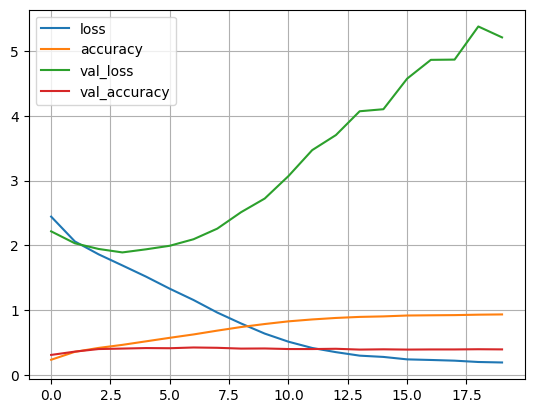

In [10]:
## evaluate data

test_score = model.evaluate(x_test, y_test)


## visualization
model_history.history.keys()
df = pd.DataFrame(model_history.history)
df.plot()
plt.grid(True)

313/313 [==============================] - 3s 8ms/step


12

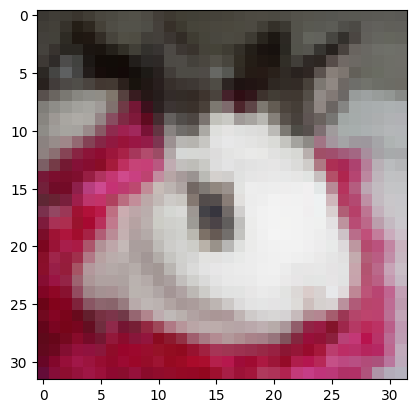

In [11]:
## save the model and load the data


##predict
y_pred = model.predict(x_test)


#### test our prediction
import numpy as np
plt.figure(figsize=(3,3))
plt.imshow(x_test[0])
#y comes in an array and the max(highest) prob is the one that is most likely  
y_pred = np.argmax(y_pred, axis = 1) 
y_pred[0]

In [ ]:
### metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

test_acc = round(accuracy_score(y_test, y_pred),3)
test_pre = round(precision_score(y_test, y_pred, average="weighted"),3)
test_rec = round(recall_score(y_test, y_pred, average="weighted"),3)

print(test_acc)
print(test_pre)
print(test_rec)


cm = confusion_matrix(y_test, y_pred, labels= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
disp.plot()
plt.show()